#Day10. 데이터수집 및 전처리

---



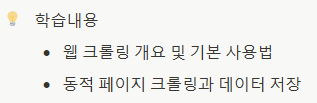

##Day9 수업 이어서 진행

##**Pandas & SQL 활용한 데이터 분석 프로젝트**



> 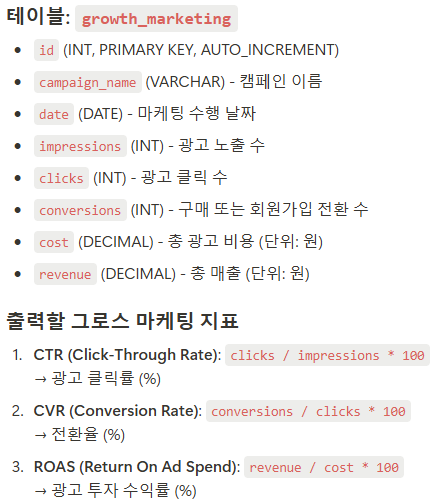



###**활용 예시**
- 데이터 분석가 또는 마케터가 **광고 성과 분석**하는 데 활용
- 추가 기능을 구현하여 **월별 평균 CTR/CVR 분석** 가능
- **광고 효율 비교** 후 예산을 효과적으로 분배하는데 활용

In [ ]:
import mysql.connector
import pandas as pd

# 1. MariaDB 연결 설정
db_config = {
    "host": "localhost",      # MariaDB 서버 주소
    "user": "hj",             # 사용자 이름
    "password": "1234",       # 비밀번호
    "database": "backend"     # 사용할 데이터베이스
}

# MariaDB 연결
conn = mysql.connector.connect(**db_config)
cursor = conn.cursor()

# 2. 기존 테이블 삭제 후 새로 생성
cursor.execute("DROP TABLE IF EXISTS growth_marketing;")
cursor.execute("""
CREATE TABLE growth_marketing (
    id INT AUTO_INCREMENT PRIMARY KEY,
    campaign_name VARCHAR(100),
    date DATE,
    impressions INT,
    clicks INT,
    conversions INT,
    cost DECIMAL(10,2),
    revenue DECIMAL(10,2)
);
""")

# 3. 샘플 데이터 생성 (pandas DataFrame 활용)
data = {
    "campaign_name": ["Google Ads", "Facebook Ads", "Instagram Ads", "YouTube Ads", "LinkedIn Ads"],
    "date": ["2025-02-01", "2025-02-02", "2025-02-03", "2025-02-04", "2025-02-05"],
    "impressions": [10000, 15000, 12000, 18000, 11000],
    "clicks": [500, 750, 600, 900, 550],
    "conversions": [50, 70, 60, 80, 55],
    "cost": [100000, 150000, 120000, 180000, 110000],
    "revenue": [500000, 750000, 600000, 900000, 550000]
}

df = pd.DataFrame(data)

# 4. 데이터 삽입
insert_query = """
INSERT INTO growth_marketing (campaign_name, date, impressions, clicks, conversions, cost, revenue)
VALUES (%s, %s, %s, %s, %s, %s, %s)
"""
values = [tuple(row) for row in df.to_numpy()] #2차원 배열로 변환하고 각행을 순차적으로 가져온 후 각행(row)을 튜플로 변환
cursor.executemany(insert_query, values)
conn.commit()

print("데이터 삽입 완료")

# 5. 데이터 조회 및 지표 계산
cursor.execute("SELECT * FROM growth_marketing")
rows = cursor.fetchall()

# 컬럼명 가져오기
column_names = [desc[0] for desc in cursor.description]
df_result = pd.DataFrame(rows, columns=column_names)

# 6. 그로스 마케팅 지표 계산 (CTR, CVR, ROAS)
df_result["CTR (%)"] = (df_result["clicks"] / df_result["impressions"]) * 100
df_result["CVR (%)"] = (df_result["conversions"] / df_result["clicks"]) * 100
df_result["ROAS (%)"] = (df_result["revenue"] / df_result["cost"]) * 100

# 7. 결과 출력 (pandas 기본 출력)
print("\n=== Growth Marketing Performance Metrics ===")
print(df_result[["campaign_name", "date", "CTR (%)", "CVR (%)", "ROAS (%)"]].to_string(index=False))

# CSV로 저장 (필요한 경우)
df_result.to_csv("growth_marketing_metrics.csv", index=False, encoding="utf-8")
print("지표 데이터를 'growth_marketing_metrics.csv' 파일로 저장하였습니다.")

# 연결 종료
cursor.close()
conn.close()



> 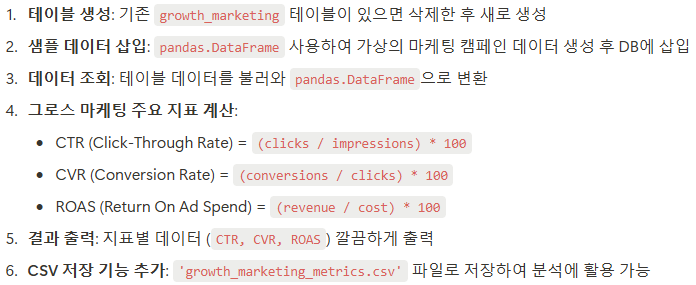



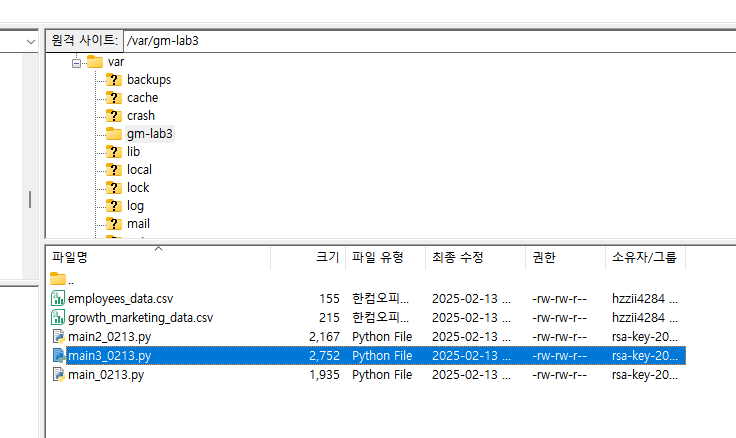

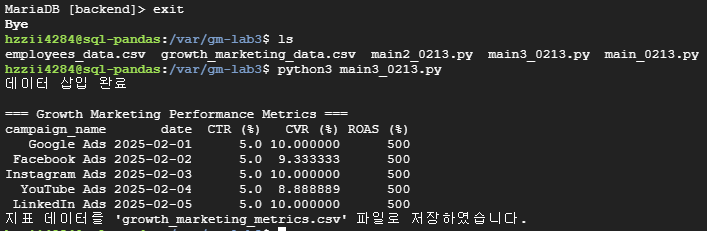

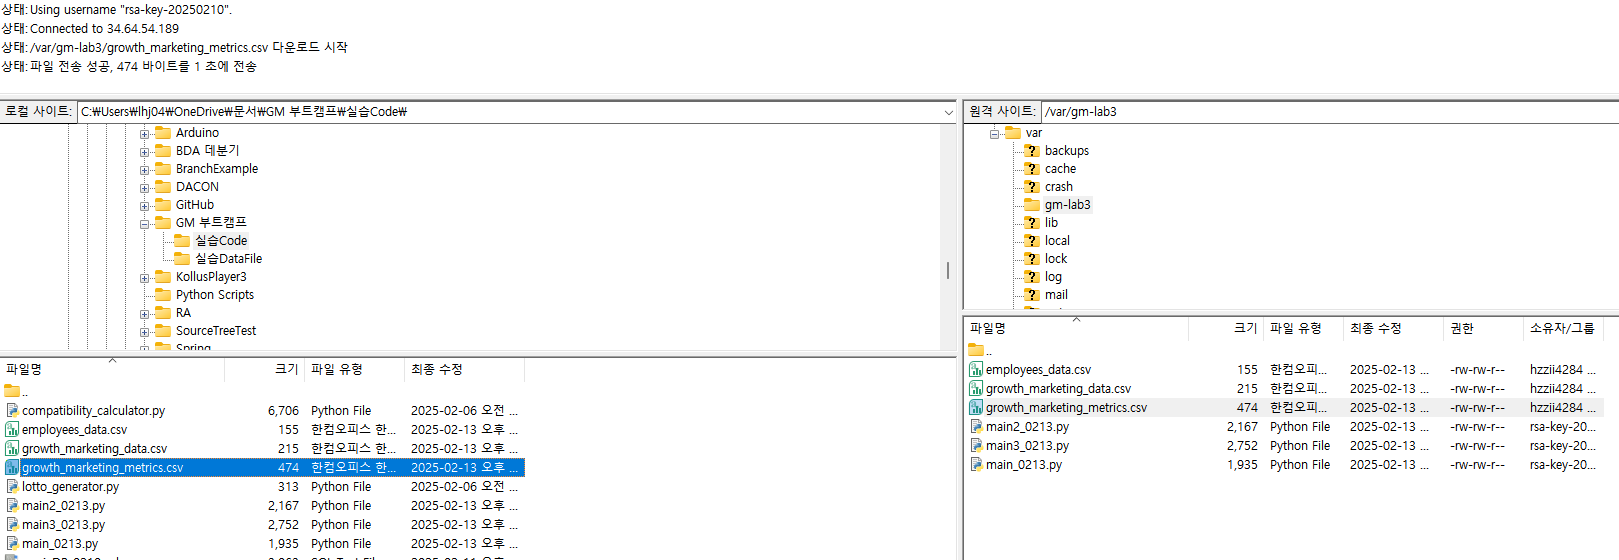

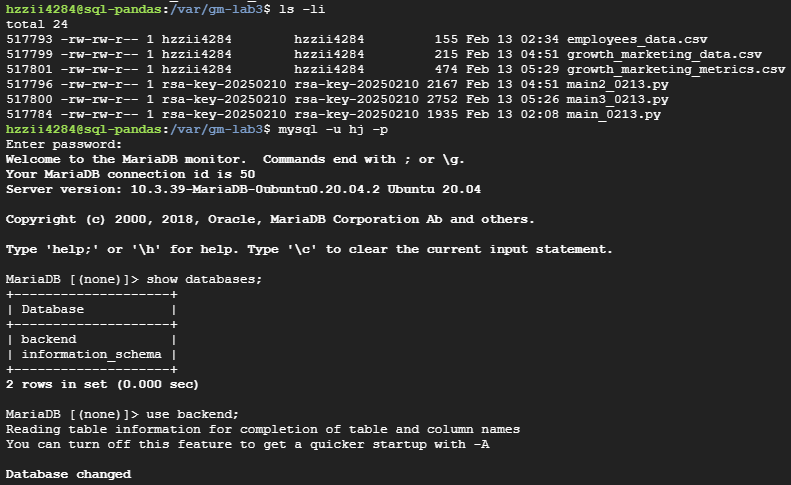

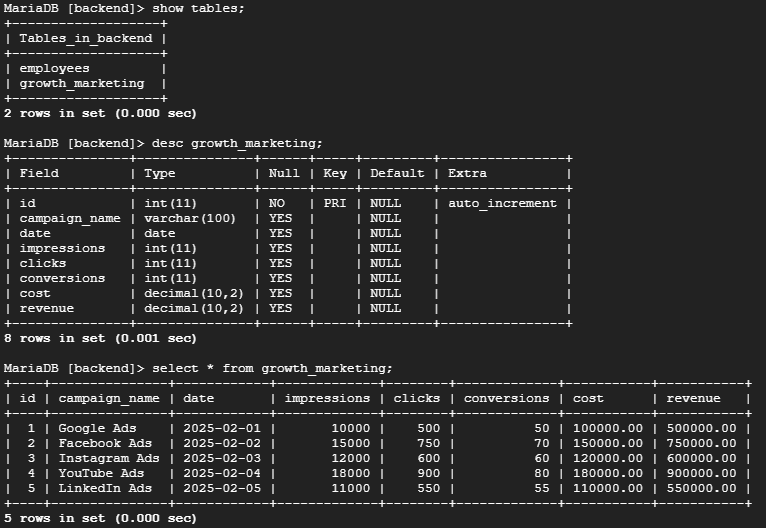



---

##**Web 연동**

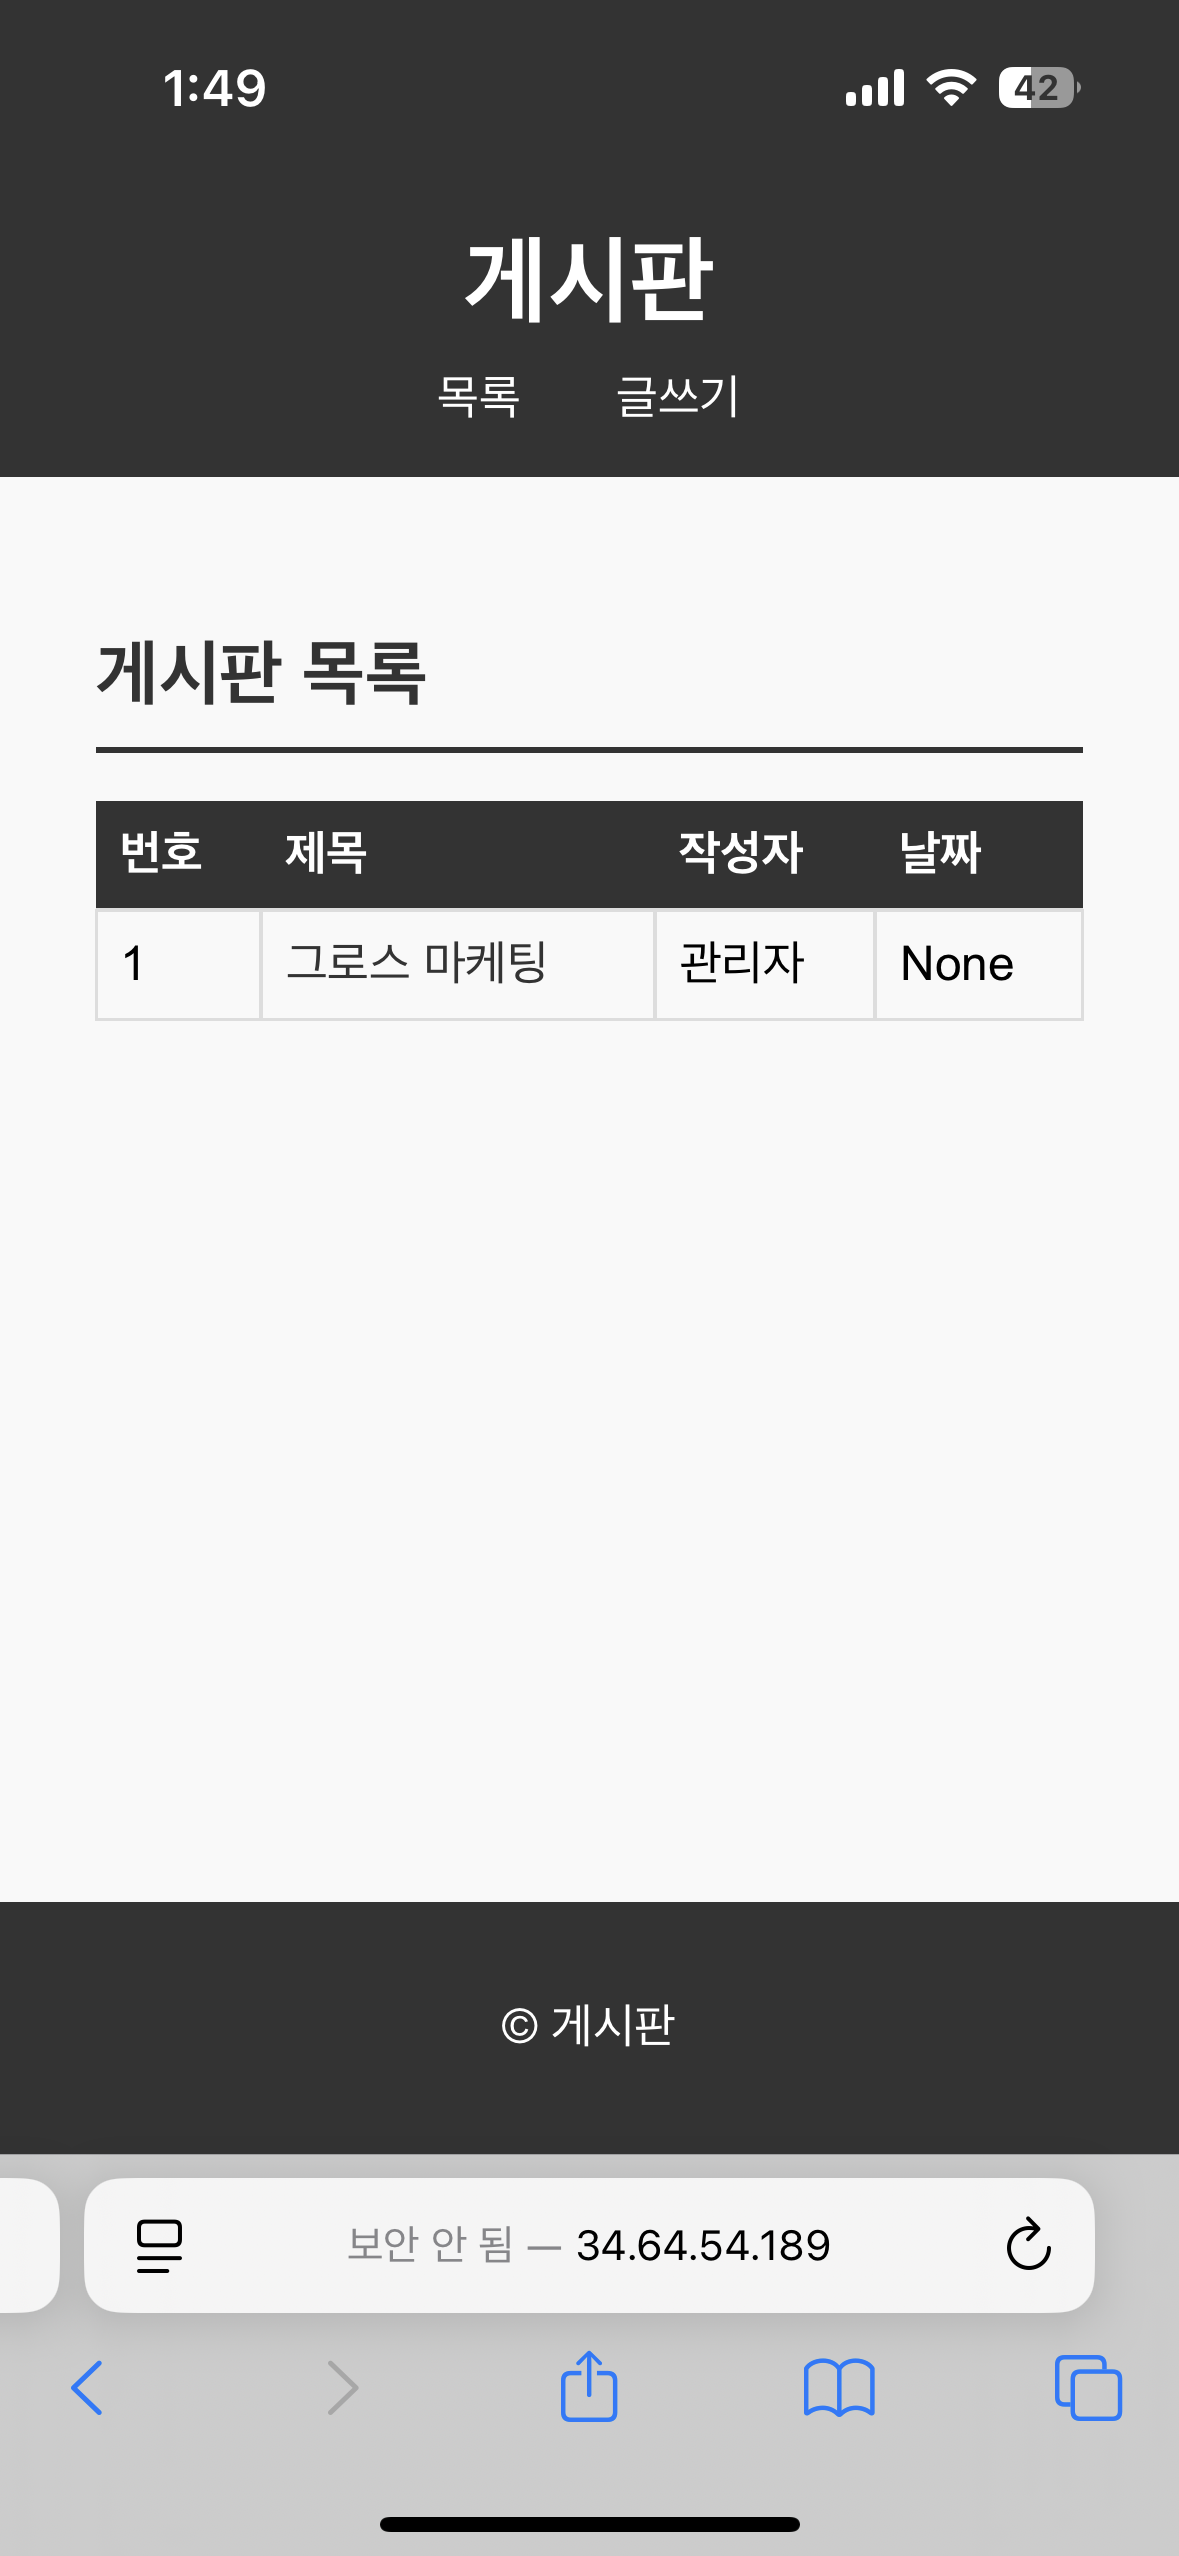

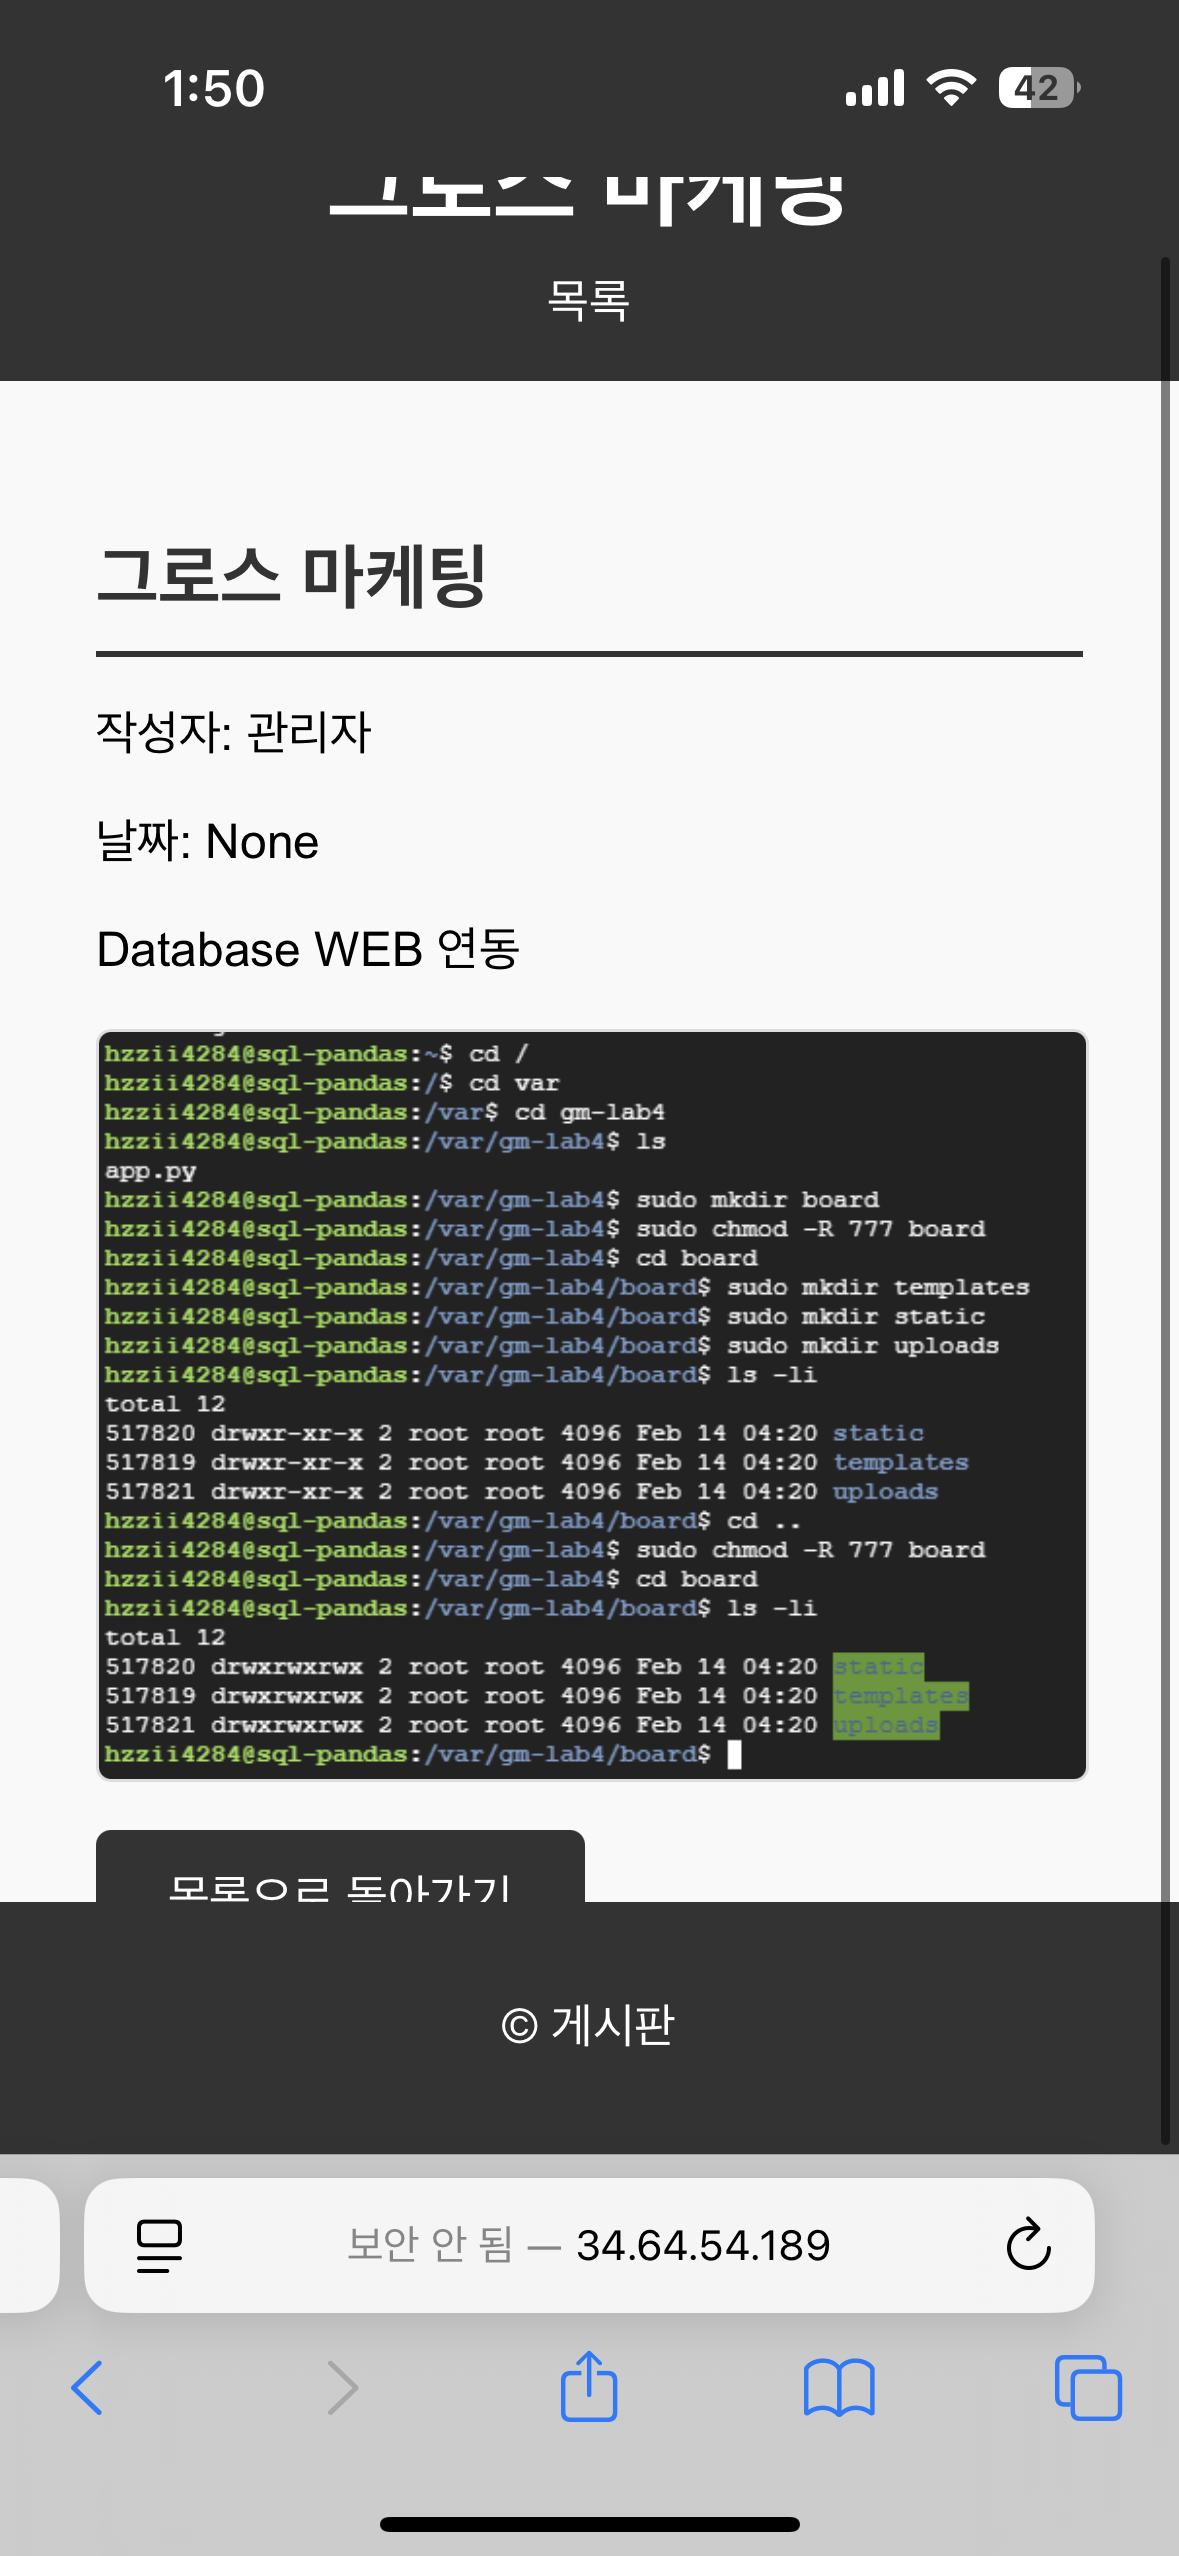



---


##**그로스 마케팅에서 크롤링의 이유 & 목적**

####**1. 경쟁사 및 시장 동향 분석**
- 경쟁사의 가격 정책, 프로모션, 마케팅 전략 등을 실시간으로 추적하여 경쟁 우위 확보 가능
- 업계 트렌드를 분석하여 소비자 선호도 변화 빠르게 감지, 마케팅 전략 조성하는 데 활용

###**2. 소비자 행동 및 리뷰 분석**
- 소셜 미디어, 블로그, 쇼핑몰 리뷰 데이터를 크롤링하여 소비자의 제품 선호도, 불만 사항, 피드백 분석
-이를 통해 제품 개선 및 맞춤형 마케팅 캠페인 기획 가능

###**3. 광고 최적화 및 키워드 분석**
- 검색 엔진 및 SNS에서 검색 트렌드, 인기 키워드를 수집하여 광고 및 SEO 전략 수립
- 소비자가 많이 검색하는 키워드를 활용하여 광고 성과 극대화 및 타겟팅 강화

###**4. 리드(잠재 고객) 발굴**
- 특정 산업군의 기업 웹사이트나 채용 공고 데이터를 크롤링하여 B2B 마케팅 리드 발굴
- 소셜미디어에서 특정 관심사를 가진 사용자 그룹을 식별하여 맞춤형 마케팅 진행

###**5. 가격 비교 및 동적 가격 조정**
- 경쟁사의 가격을 크롤링하여 실시간으로 가격을 조정하는 다이내믹 프라이싱(Dynamic Pricing) 전략 적용
- 마켓플레이스에서 동일한 제품의 최저가 및 평균 가격을 분석하여 가격 정책 최적화

###**6. 콘텐츠 마케팅 전략 수립**
- 인기 있는 블로그, 뉴스, SNS 콘텐츠를 분석하여 소비자가 관심을 가지는 주제 파악
- 이를 바탕으로 블로그, 유튜브, 뉴스레터 등에서 효과적인 콘텐츠 제작 가능

###**7. 제품 수요 예측 및 재고 관리**
- 이커머스 플랫폼에서 특정 제품의 판매 데이터와 검색량을 크롤링하여 수요 예측
- 이를 통해 효율적인 재고 관리 및 마케팅 캠페인 기획 가능

###**8. SNS 및 커뮤니티 모니터링**
- 트위터, 인스타그램, 유튜브, 레딧 등의 데이터를 크롤링하여 특정 브랜드나 제품에 대한 소셜 리스닝(Social Listening) 수행
- 브랜드 인지도, 소비자 반응, 바이럴 마케팅 효과 분석 가능



---

##**스타트업을 위한 그로스 마케팅 크롤링 전략**

###**1. 목표 설정**

> 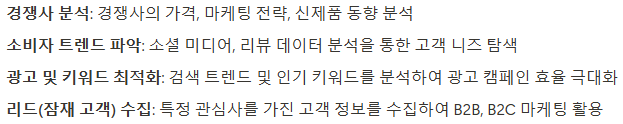



###**2. 데이터 소스 선정**
- **어디에서 데이터를 크롤링할 것인가?**
- 도메인과 마케팅 전략에 따라 다름

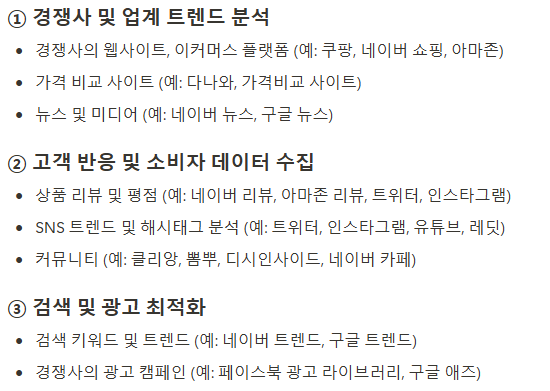

###**3. 크롤링 기술 스택 선정**

> 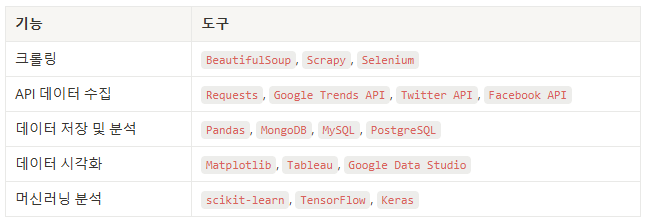


###**4. 크롤링 실행 및 데이터 수집**

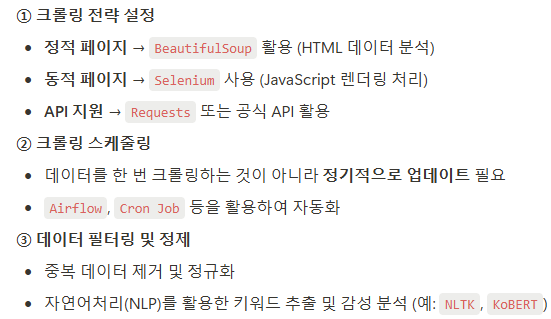

###**5. 데이터 분석 및 활용**

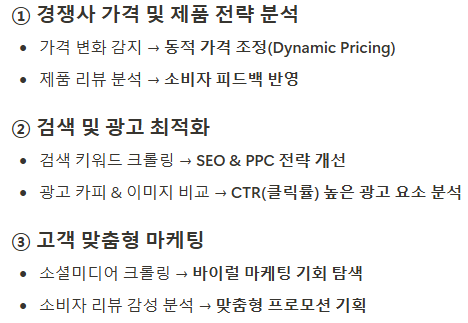

###**6. 크롤링 법적 이슈 및 윤리적 고려**

> 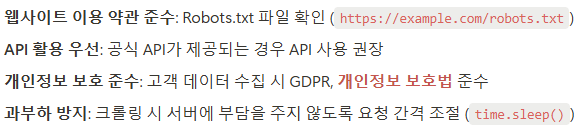



###**7. 크롤링 기반 그로스 마케팅 적용 사례**

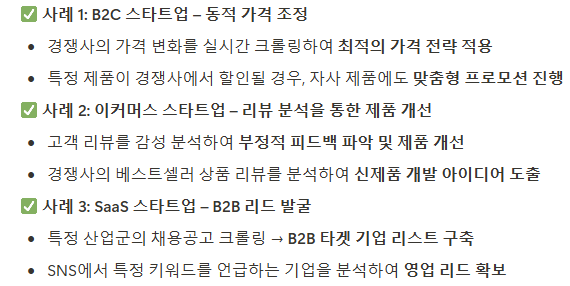



---

##**크롤링 기본 사용법**

In [1]:
import requests
from bs4 import BeautifulSoup
from urllib.parse import quote_plus, urljoin

# 🔹 검색어 입력 (변경 가능)
search_query = "인공지능"

# 🔹 Google 뉴스 검색 URL (검색어 인코딩 포함)
google_news_url = f"https://www.google.com/search?q={quote_plus(search_query)}&tbm=nws"

# 🔹 User-Agent 설정 (자동화 감지 방지)
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/90.0.4430.93 Safari/537.36"
}

# 🔹 HTTP 요청 보내기
response = requests.get(google_news_url, headers=headers)

# 🔹 응답 확인
if response.status_code == 200:
    soup = BeautifulSoup(response.text, "html.parser")

    # 🔹 뉴스 검색 결과 찾기
    news_results = soup.find_all("div", class_="SoaBEf")  # ✅ Google 뉴스 검색 결과 태그

    # 🔹 최대 10개 뉴스 가져오기
    for idx, news in enumerate(news_results[:10], start=1):
        try:
            # 뉴스 제목 추출
            title_tag = news.find("h3")
            title = title_tag.text.strip() if title_tag else "제목 없음"

            # 뉴스 설명 추출 (Google이 종종 변경하는 요소)
            desc_tag = news.find("div", class_="GI74Re nDgy9d")
            if not desc_tag:
                desc_tag = news.find("div", class_="BNeawe s3v9rd AP7Wnd")
            description = desc_tag.text.strip() if desc_tag else "설명 없음"

            # 뉴스 링크 추출 (Google 상대 URL을 절대 URL로 변환)
            link_tag = news.find("a")
            link = urljoin("https://www.google.com", link_tag["href"]) if link_tag else "링크 없음"

            # 결과 출력
            print(f"{idx}. 제목: {title}")
            print(f"   설명: {description}")
            print(f"   링크: {link}")
            print("-" * 50)

        except Exception as e:
            print(f"뉴스 정보를 가져오는 중 오류 발생: {e}")

else:
    print(f"Google 요청 실패: 상태 코드 {response.status_code}")

1. 제목: 제목 없음
   설명: 영국의 한 침구 제조 업체가 수면 결핍이 부르는 신체 변화를 인공지능(AI)으로 분석해 공개했다. 생기 없는 얼굴과 근육 빠진 몸이 특징이다.
   링크: https://www.chosun.com/medical/2025/02/14/H4MABYQU4RF3XJS6AFP5IZZI2E/
--------------------------------------------------
2. 제목: 제목 없음
   설명: 국내 팹리스(반도체 설계업체)와 파운드리(반도체 위탁생산), 반도체 수요 기업 등이 '드림팀'을 결성해 K온디바이스 인공지능(AI) 반도체를 만든다.
   링크: https://www.edaily.co.kr/News/Read?newsId=04424726642070192&mediaCodeNo=257
--------------------------------------------------
3. 제목: 제목 없음
   설명: 한눈에 보는 오늘 : 홈 - 뉴스 : (부산=연합뉴스) 조정호 기자 = 부산시교육청은 학교 현장에서 인공지능(AI)과 함께 생각하고 질문하는 수업을...
   링크: https://news.nate.com/view/20250214n10247
--------------------------------------------------
4. 제목: 제목 없음
   설명: 인공지능(AI) 분야의 인재 확보 전쟁이 치열해지고 있는 가운데 국내 AI 스타트업 엔지니어들의 연봉 수준이 중국 AI업체 딥시크가 내건 채용 연봉의...
   링크: https://www.donga.com/news/Economy/article/all/20250214/131029638/2
--------------------------------------------------
5. 제목: 제목 없음
   설명: 메타가 한국의 AI 반도체 스타트업 퓨리오사AI를 인수하기 위한 논의를 진행 중이라고 미 언론사 포브스가 익명의 소식통을 인용해 11일



---

##**주요 상용 크롤링 서비스**

> 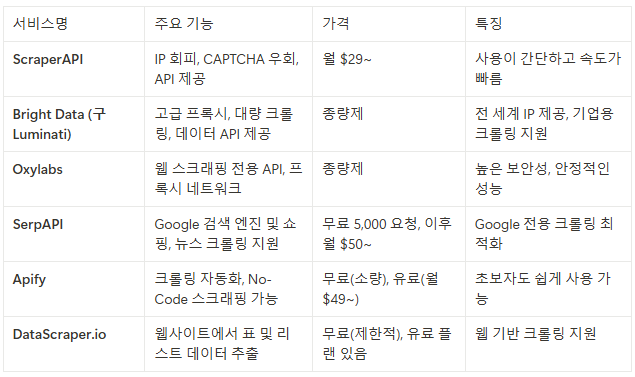

